# Topic 6a: Bayes' Theorem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We have talked about data analysis thus far with using the word "error bar".  This is a somewhat shocking omision, as data without errors are pretty useless. However, our goal in this course is not just to give you a tool that you don't understand, but to teach you what the tools are for.  Error bars are an extreme example, as they are both the most important part of any scientific analysis and yet are the piece most likely to be wrong.

A good way understand errors and apply them effectively is to think like a Bayesian.  The reason is that it puts you and your hypotheses right in the middle of the action so that you can see how your choices matter.

To get us started, this is Bayes' Theorem:
$$P(H | D) = P(H) P(D|H) / P(D)$$
Where $P(H|D)$ is the probability of the Hypothesis ($H$) given the data ($D$) and vise versa for $P(D|H)$, and $P(H)$ ($P(D)$) is the probability of the hypothesis (data).

I always find this very hard to understand.  There are a bunch of variables I don't know what they mean.  So, let's think about a simple example:  

### Example: Hit by a Taxi

You live in a place where the are 85 percent green taxis and 15 percent blue taxis.  You got hit by a taxi and a witness claims it was blue.  However, it is determined that eye-witness are accurate about 80 percent of the time and mis-identify the color 20 percent of the time.

So the question is "what is the probability you were hit by a blue cab?".  So, our hypothesis ($H$) is that we you hit by a blue cab and we want to compute $P(H|D)$, given the data ($D$) that someone saw a blue cab.  If we didn't know the theorem, what would we do?  We would say, the probably a blue cab was involved, knowing nothing else is 15 percent ($P(H) =0.15)$) and the probably that someone would see a blue cab if it was a blue cab is 80 percent ($P(D|H) = 0.80$).  The answer is not $0.15 \times 0.80$ because (1) this makes no sense - even when $P(D|H) =1$ it gives a small probability and (2) the probabilities of the 2 possibilities don't add to 1 - $0.15 \times 0.8 + 0.85 \times 0.2 \neq 1$.  To normalize our answer correclty, we need to divide by all the different ways we could arrive at the data, namely $0.15 \times 0.8 + 0.85 \times 0.2$.  So, our answer is

$$P(H={\rm blue}|D) = \frac{0.15 \times 0.8}{0.15 \times 0.8 + 0.85 \times 0.2} \sim 0.41$$

Notice that if if the eye witness is perfect ($P(D|H) = 1$), our answer is 1, as it should be.

The probability of the data, $P(D)$, doesn't actually depend on the hypothesis: it is a sum over all possibilities.  Its role in life is just to make the probability normalized to one.  To see this, we note that the only two options are that you got hit by a blue taxi or a green taxi.  If we were to now ask "what is the probability you were hit by a green taxi?", we would have to change $𝑃(𝐷|𝐻)=0.2$ (there is only a 20\% chance that the witness would think it was blue if it was really green) but the probability of the hypothesis itself should $P(H) = 0.85$ since 85\% of taxis are green.  But the probability of the data stays the same, since we already enumated all the possibilities.  This means that
$$P(H={\rm Green}|D) = \frac{0.2 \times 0.85}{0.15 \times 0.8 + 0.85 \times 0.2} \sim 0.59$$
Notice that now 
$$P(H={\rm Green}|D) + P(H={\rm Blue}|D) = 1$$
This is really what Bayes' theorem is all about: one of the hypotheses must be true, so if $P(H|D)$ is really a probability, then it must add to up one when we sum over all the possibility.  Bayes' theorem is just reminding us how to do that.

## Application: coin flipping

Suppose we have a coin that gives us heads with probability $p$ and tails with probability $1-p$ where $p \in [0,1]$ is unknown to us.  Now I flip the coin $1000$ times and get $550$ heads and $450$ tails.  What do you think $p$ is?

One way to look at it is to simply simulate what happenss with a fair coin as ask it how often you get 550 heads.  Let's try 1000 simulations:

In [2]:
N_sims=1000
heads=np.zeros(N_sims)
for i in range(N_sims):
    heads[i]=np.random.randint(2,size=1000).sum()

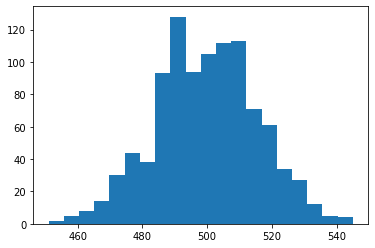

In [3]:
fig,ax=plt.subplots()
ax.hist(heads,bins=20)
plt.show()

In [4]:
heads.max()

545.0

Getting 550 heads is possible but very unlikely when $p=1/2$ (a fair coin).  Instead, let's apply the machinary of Bayes:

Let's say we have $N$ total flips and get $n$ heads.  The probably of finding $n$ heads for a given $p$ gives us the probabability of the data (the likelihood):
$$P(D | H) = P(n | r) = p^n (1-p)^{N-n} \Big(\frac{N}{n} \Big)$$
where we have the binomial coefficient $\Big(\frac{N}{n} \Big)$ which accounts for all the possible ways of getting $n$ heads (e.g. if you get only $n=1$, it could have been on the first, second...,last flip of the coin).

We have no idea what the probably of the different models is, so we will assume a flat distribution $P(p) = $ constant.  Finally, we need to normalize the result by dividing by the integral over $p$, such that
$$P(p| n ) =  p^n (1-p)^{N-n} \Big(\frac{N}{n} \Big) /(\int_0^1 dp p^n (1-p)^{N-n} \Big(\frac{N}{n} \Big))$$


Let's apply this to $N=1000$ and $n=550$:

In [5]:
from scipy import integrate
from scipy import special

In [6]:
integrate.quad(lambda p:p**(550)*(1-p)**(450)*special.binom(1000,500),0,1)

(0.14876167743337448, 4.263789920566359e-09)

(0.5, 0.6)

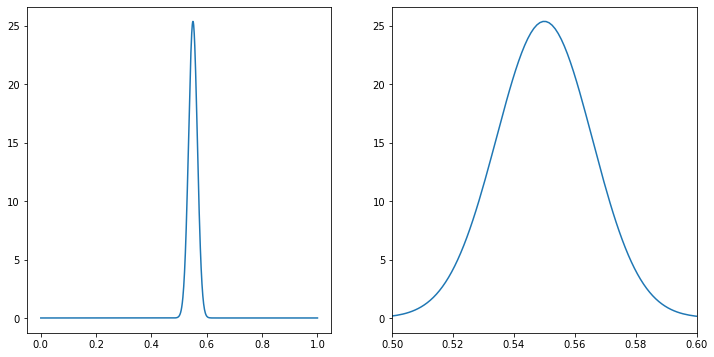

In [7]:
p_lin=np.linspace(0,1,1000)
fig,ax=plt.subplots(figsize=(12,6),ncols=2)
ax[0].plot(p_lin,p_lin**(550)*(1-p_lin)**(450)*special.binom(1000,500)/0.14876167743337448)
ax[1].plot(p_lin,p_lin**(550)*(1-p_lin)**(450)*special.binom(1000,500)/0.14876167743337448)
ax[1].set_xlim(0.5,0.6)

Note: the binomial coefficients are totally unnecessary but they keep us from multiplying and dividing by very small numbers:

In [8]:
integrate.quad(lambda p:p**(550)*(1-p)**(450),0,1)

(5.505028184578253e-301, 9.11751014007829e-301)

Now we can still compare to simulations.  Notice that our distribution is peark at 0.55 =550/1000, so we can simulate $p=0.55$ and compare to our figure

In [9]:
N_sims=1000
heads_p=np.zeros(N_sims)
for i in range(N_sims):
    heads_p[i]=(np.random.rand(1000) < 0.55).sum()/1000.   

(0.5, 0.6)

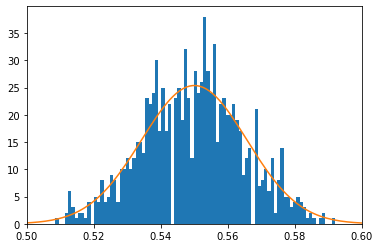

In [10]:
fig,ax=plt.subplots()
ax.hist(heads_p,bins=100)
ax.plot(p_lin,p_lin**(550)*(1-p_lin)**(450)*special.binom(1000,500)/0.14876167743337448)
ax.set_xlim(0.5,0.6)

## Gaussian Noise

Now let us return to our previous discussion of data where we had a deterministic model for the signal and a random source of noise 
$$ data(t)=S(t) + noise(t)$$ 
The noise is drawn from a Gaussian distribution with a standard deviation $\sigma$. 

It is definitely easier to measure $S(t)$ if we know what $\sigma$ is ahead of time.  But how would we know this?  In many cases, we can simply make a measurement when we know there is no signal.  E.g. if you cover up a telescope, then the pictures you take are just the noise of your camera.  By doing this, we get $N$ measurements drawn from a Gaussian distribution but we don't know $\sigma$.  Now we can use our machinary of Bayesian inference to figure it out.  For each data point, $n_i$, the probability of the data, given a $\sigma$ is 
$$P(n_i) =\frac{\Delta n}{\sqrt{2\pi}\sigma} e^{-n_i^2/(2\sigma^2)}$$ 
where $\Delta n$ is accuracy with which I measure the noise, i.e. it is the size of the bins in which we group $n_i$ since we are not measuring to infinite accuracy.

Let's assume we know thing about $\sigma$ so that $P(\sigma) =$ constant, since $P(D)$ is also just some constant, we can worry about normalization our result later.  Putting this together, we have
$$ P(\sigma | n_i) = \prod_i P(n_i) = \frac{1}{(2\pi)^{N/2} \sigma^N} e^{-(\sum_i n_i^2)/(2\sigma^2)}$$

We learn wwo things: (1) we recall that $\sum_i n_i^2 \approx N \bar \sigma^2$ where $\bar \sigma$ is the true variance.  We can make a figure of this function:

In [11]:
from scipy import integrate

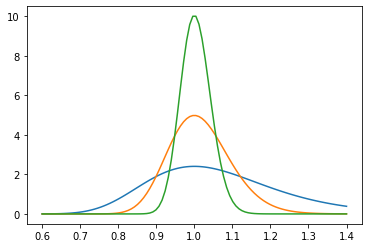

In [12]:
s=np.linspace(0.6,1.4,100)
def chiout(s,N,s0=1):
    const=integrate.quad(lambda x:np.exp(-N*s0**2/(2*x**2))/(np.sqrt(2*np.pi*x**2)**(N)),0.2,2,limit=10000)
    return np.exp(-N*s0**2/(2*s**2))/(np.sqrt(2*np.pi*s**2)**(N))/const[0]
plt.plot(s,chiout(s,20))
plt.plot(s,chiout(s,80))
plt.plot(s,chiout(s,320))

We see that this follows a familiar pattern: when we increase the amount data by a factor of 4, the width of these curves decreases by a factor of two.  Said differently our error scales as $1/\sqrt{N}$ 

(2) we can apply this to data for any $n_i$ and find the maximum $\sigma$. The maximum likelihood will will not necessarily reproduce the one we used to represent the data, but the likelihood should include a reasonably large probability of the true value.

In [13]:
ni=np.random.randn(30)

In [14]:
def chi_data(s,n_in):
    noise2=(n_in**2).sum()
    N=len(n_in)
    const=integrate.quad(lambda x:np.exp(-noise2/(2*x**2))/(np.sqrt(2*np.pi*x**2)**(N)),0.2,2,limit=10000)
    print(const)
    return np.exp(-noise2/(2*s**2))/(np.sqrt(2*np.pi*s**2)**(N))/const[0]

(4.372129572567773e-32, 2.0662824425442126e-33)
(1.8240521694799357e-31, 3.0056520286038797e-34)
(6.250989872809787e-32, 2.3781059745672675e-33)
(2.3631955935466617e-33, 3.654808244703056e-36)
(1.2365112313922088e-30, 2.979037196263022e-31)
(1.3125919282949607e-27, 9.950612044298351e-28)
(1.912201515856392e-29, 2.1369011910323926e-32)
(2.3060441467182898e-29, 5.507964964444194e-31)
(7.168012629118421e-29, 4.51057372062073e-29)
(1.4298236207569674e-27, 9.526810708751135e-28)


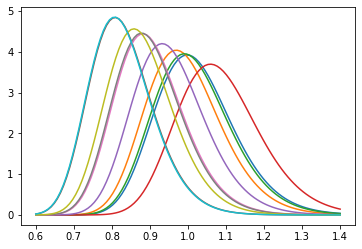

In [15]:
for i in range(10):
    ni=np.random.randn(50)
    plt.plot(s,chi_data(s,ni))
plt.show()

(2.1907643168050416e-182, 3.4033535810970035e-182)
(3.5656424577469174e-186, 6.896545388481329e-187)
(8.627487939367348e-192, 1.2682130672888978e-191)
(5.815698140530597e-184, 8.850725305998306e-184)
(1.1751302652090763e-180, 1.8455065026865918e-180)
(6.660622683601882e-185, 1.0293582155762576e-184)
(9.228252870291996e-185, 1.4224449569031609e-184)
(5.301077057635474e-189, 8.236403373858258e-189)
(1.0346828820457025e-181, 1.6168927333812585e-181)
(3.861957040420618e-188, 6.051188545138598e-188)


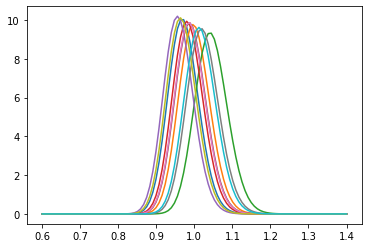

In [16]:
for i in range(10):
    ni=np.random.randn(300)
    plt.plot(s,chi_data(s,ni))
plt.show()

Of course, we know the maximum of this curve will lie at $\sigma = \sqrt{\sum n_i^2/N}$, so we can also just make a histogram of the maximum likelihood points as 

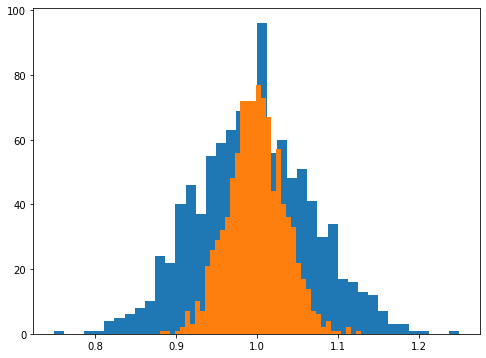

In [17]:
Nsims=1000
Ndata=100
max_list=np.zeros(Nsims)
max_list_h=np.zeros(Nsims)
for i in range(Nsims):
    ni=np.random.randn(Ndata)
    max_list[i]=np.sqrt((ni**2).sum()/Ndata)
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(max_list,bins=40)
Ndata=400
for i in range(Nsims):
    ni=np.random.randn(Ndata)
    max_list_h[i]=np.sqrt((ni**2).sum()/Ndata)
ax.hist(max_list_h,bins=40)
plt.show()

We again see that the width of these histograms scales as $1/\sqrt{N}$.

### Bayesian Inference for the Signal

Taking enough data with no signal, we can determine $\sigma$ to good enough accuracy that we will assume it is known.  This isn't always true, but it simplifies how we think about measuring the signal.  We return again to our assumption, but now let's make it clear that our hypothesis is only about the signal:
$$ data(t|H)=S(t|H) + noise(t)$$ 
However, the only thing that is random is the noise, so the probability of the data is simply:
$$P(D|H) =\frac{1}{(2\pi)^{N/2} \sigma^N} e^{-(\sum_i (data(t_i) - S(t_i))^2/(2\sigma^2)}$$
This is literally just the same equation we had before since $data_i -S_i =n_i$.  However, now our posterior is for the parameters of our model, rather than $\sigma$.

Let's see how this works for a line with noise:

In [18]:
trange=np.linspace(0,10,1000)
data_t=0.07*trange+np.random.randn(1000)

In [19]:
def Pos_line(data,a,b,t,s=1):
    noise2=((data-a*t-b)**2).sum()
    return np.exp(-noise2/(2*s**2))

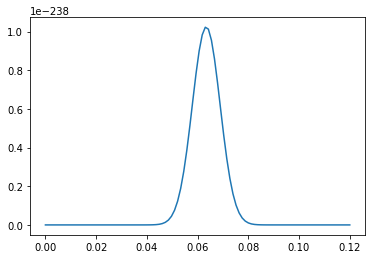

In [20]:
a_r=np.linspace(0,0.12,100)
Pos_r=np.zeros(100)
for i in range(100):
    Pos_r[i]=Pos_line(data_t,a_r[i],0,trange)
plt.plot(a_r,Pos_r)
plt.show()

We notice the very small size of the posterior here, because I didn't bother to normal by dividing by $P(D)$. In practice, we we need to know about the postior is just the maximum likelihood point and $1\sigma$, $2\sigma$, $3\sigma$ lines. However for this we don't actually need to work with the full posterior.  Instead we can take the log: 
$$-2\log P(H,D) = \sum_i (data(t_i) - S(t_i))^2/(\sigma^2) +{\rm constant} $$
We see that minimizing $-\log P(H,D)$ is exactly the same quantity we minimized in finding our best fit curves.  Now suppose that in the vacinity of the maximum likelihood point for a parameter of our model, $a$ we have
$$ -\log P(H,D) \approx -\frac{(a-a_{\rm min})^2}{2 \sigma_a^2}$$
Then when $a = a_{\rm min} + n \sigma_a$ we have $-2\log P(H,D) = -2\log P(H,D)|_{a_{\rm min}}+ n^2$

In [21]:
def chi_line(data,a,b,t,s=1):
    noise2=((data-a*t-b)**2).sum()
    return noise2/(s**2)

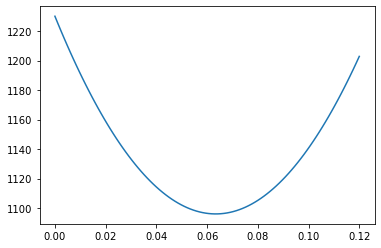

In [22]:
chi_r=np.zeros(100)
for i in range(100):
    chi_r[i]=chi_line(data_t,a_r[i],0,trange)
plt.plot(a_r,chi_r)
plt.show()

In [23]:
from scipy.optimize import minimize
from scipy.optimize import newton

In [24]:
a_min_loc=minimize(lambda x:chi_line(data_t,x,0,trange),0.070)['x']
minimize(lambda x:chi_line(data_t,x,0,trange),0.070)

      fun: 1095.9815489828575
 hess_inv: array([[1.49924966e-05]])
      jac: array([3.05175781e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 76
      nit: 1
     njev: 32
   status: 2
  success: False
        x: array([0.06340272])

Having found the location of the minimum, we now proceed to find the value of the minimum and the location of the $1\sigma$ and $2\sigma$ contours:

In [25]:
chi_min=chi_line(data_t,a_min_loc,0,trange)
Pos_max=Pos_line(data_t,a_min_loc,0,trange)
print(chi_min,Pos_max)

1095.9815489828575 1.0247796779601787e-238


The $1\sigma$ lines are the minimum $\chi^2 +1$

In [26]:
s1L=newton(lambda x:chi_line(data_t,x,0,trange)-chi_min-1,0.065)
print(s1L)

0.06887857997310061


In [27]:
s1R=newton(lambda x:chi_line(data_t,x,0,trange)-chi_min-1,0.08)
print(s1R)

0.0688785799740147


The $2\sigma$ lines are the minimum $\chi^2 +2$

In [28]:
s2L=newton(lambda x:chi_line(data_t,x,0,trange)-chi_min-4,0.065)
print(s2L)

0.0743544353853341


In [29]:
s2R=newton(lambda x:chi_line(data_t,x,0,trange)-chi_min-4,0.08)
print(s2R)

0.07435443538538289


In [30]:
chi_min

1095.9815489828575

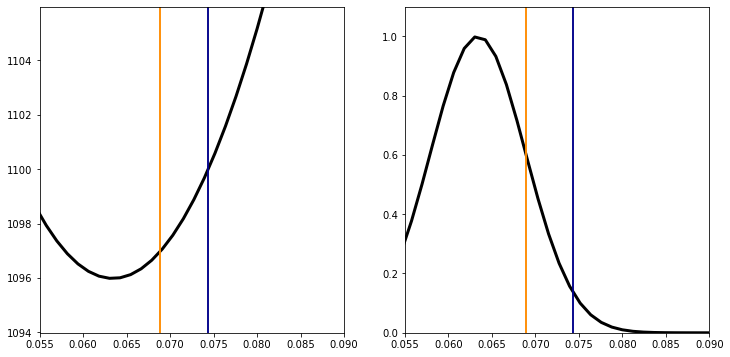

In [31]:
fig,ax=plt.subplots(figsize=(12,6),ncols=2)
ax[0].plot(a_r,chi_r,lw=3,color='black')
ax[0].plot(s1L*np.ones(2),[chi_min-2,chi_min+10],color='darkorange')
ax[0].plot(s1R*np.ones(2),[chi_min-2,chi_min+10],color='darkorange')
ax[0].plot(s2L*np.ones(2),[chi_min-2,chi_min+10],color='darkblue')
ax[0].plot(s2R*np.ones(2),[chi_min-2,chi_min+10],color='darkblue')
ax[0].set_xlim(0.055,0.09)
ax[0].set_ylim(chi_min-2,chi_min+10)
ax[1].plot(a_r,Pos_r/Pos_max,lw=3,color='black')
ax[1].plot(s1L*np.ones(2),[0,1.1],color='darkorange')
ax[1].plot(s1R*np.ones(2),[0,1.1],color='darkorange')
ax[1].plot(s2L*np.ones(2),[0,1.1],color='darkblue')
ax[1].plot(s2R*np.ones(2),[0,1.1],color='darkblue')
ax[1].set_xlim(0.055,0.09)
ax[1].set_ylim(0,1.1)
plt.show()

In [32]:
print(a_min_loc-s1L,s1R-a_min_loc)
print(a_min_loc)

[-0.00547586] [0.00547586]
[0.06340272]


At $1\sigma$, we have determined that $a = a_{\rm min} \pm 0.0055$

Now, our line is really a two dimensional space, not a one dimensional space. In this case we have two options: (1) we want to know the multi-dimensional behavior (make a contour plot) or (2) we average over a parameter we don't care about (marginalize).  

First, let us repeat what we did above but now using the model $S(t|a,b)= a t+b$.  First we find the minimum 

In [33]:
minimize(lambda X:chi_line(data_t,X[0],X[1],trange),[0.07,0],method='Nelder-Mead',tol=1e-6)

 final_simplex: (array([[0.05030447, 0.08736517],
       [0.05030455, 0.0873653 ],
       [0.05030469, 0.08736423]]), array([1094.07051715, 1094.07051715, 1094.07051715]))
           fun: 1094.0705171525187
       message: 'Optimization terminated successfully.'
          nfev: 108
           nit: 57
        status: 0
       success: True
             x: array([0.05030447, 0.08736517])

In [34]:
line_sol=minimize(lambda X:chi_line(data_t,X[0],X[1],trange),[0.07,0],method='Nelder-Mead',tol=1e-6)['x']

It might seem a bit surprising that when we fit the line, the best fit value of $a$ is quite far from our best fit result.  Concretely, when we set $b=0$, we got $a\sim 0.07 \pm 0.055$ and now our best fit $a$ looks like it is more than 2$\sigma$ off.  We can check that the line is a good fit to the data

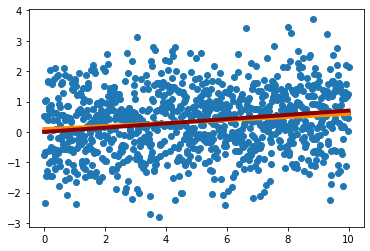

In [35]:
plt.scatter(trange,data_t)
plt.plot(trange,line_sol[0]*trange+line_sol[1],lw=4,color='darkorange')
plt.plot(trange,0.07*trange,lw=4,color='darkred')
plt.show()

Now let's understand what is going on by making a figure of the 2D posterior.

In [36]:
chi_min_line=chi_line(data_t,line_sol[0],line_sol[1],trange)
print(chi_min_line)

1094.0705171525187


In [37]:
b_r=np.linspace(-0.5,0.5,100)
A,B=np.meshgrid(a_r,b_r)
logP=np.zeros(A.shape)
for i in range(100):
    for j in range(100):
        logP[i,j]=chi_line(data_t,A[i,j],B[i,j],trange)

In order to choose contours, we need to know the values of $\chi^2$ that correspond the 1$\sigma$ (~68\%) and $2\sigma$(~95\%) confidence regions (i.e. you have the same probability of finding the true mode there as if it was a $1\sigma$ or $2\sigma$ line for a Gaussian.  For a 2 dimensional space, the answer is 2.3 and 6.18 so we make the contours as:

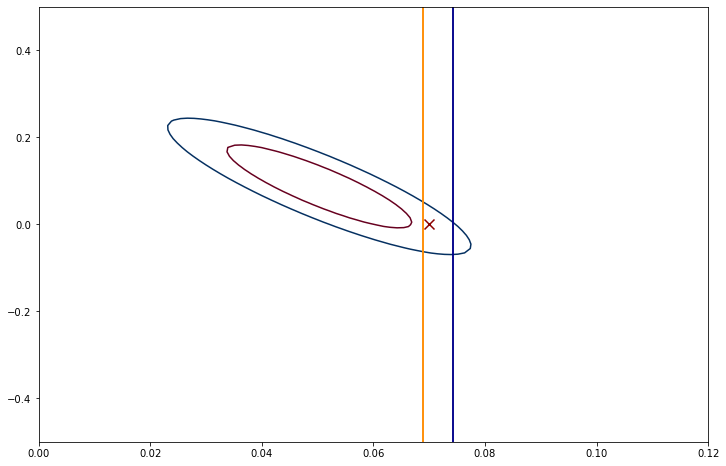

In [38]:
fig,ax=plt.subplots(figsize=(12,8))
ax.contour(A,B,logP,cmap='RdBu',levels=[chi_min_line+2.30,chi_min_line+6.18])
ax.scatter(0.07,0,marker='x',s=100,color='darkred')
ax.plot(s1L*np.ones(len(b_r)),b_r,color='darkorange')
ax.plot(s1R*np.ones(len(b_r)),b_r,color='darkorange')
ax.plot(s2L*np.ones(len(b_r)),b_r,color='darkblue')
ax.plot(s2R*np.ones(len(b_r)),b_r,color='darkblue')
plt.show()

This figure reveals that it is pretty hard to tell apart $a$ and $b$.  When we include the possibility of $b\neq 0$, we see that the allowed values of $a$ cover a much larger region compared to the lines that show the 1$\sigma$ and 2$\sigma$ lines we found when $b=0$.  

We can also look at this in terms of the posterior for $a$ ignoring $b$.  Rather than a conditional probability for the pair $(a,b)$ we just want to know the probability of $a$ including all possible $b$ values.  

We can think of this like we are flipping a pair of coins and we want to count how often they match.  We have to add up all the cases where you get two heads or two tails, even though we know they are different.  We are doing the same here, we are going to add up all pairs of $(a,b)$ that have the same value of $a$:

In [39]:
def chi_marg(data,a,t,s=1):
    Mar_pos=integrate.quad(lambda x: Pos_line(data,a,x,t,s=1),-1,1)[0]
    return -2*np.log(Mar_pos)

In [40]:
chi_marg(data_t,0.07,trange)

1102.3795001843712

In [41]:
chi_mar_out=np.zeros(len(a_r))
for i in range(len(a_r)):
    chi_mar_out[i]=chi_marg(data_t,a_r[i],trange)

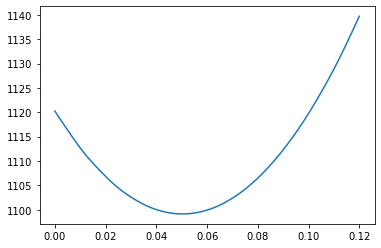

In [42]:
plt.plot(a_r,chi_mar_out)

In [43]:
a_min_marg=minimize(lambda x:chi_marg(data_t,x,trange),0.080,method='Nelder-Mead',tol=1e-6)['x']

In [44]:
chi_min_marg=chi_marg(data_t,a_min_marg,trange)    

In [45]:
s1L_marg=newton(lambda x:chi_marg(data_t,x,trange)-chi_min_marg-1,0.07)
print(s1L_marg)
s1R_marg=newton(lambda x:chi_marg(data_t,x,trange)-chi_min_marg-1,0.09)
print(s1R_marg)
s2L_marg=newton(lambda x:chi_marg(data_t,x,trange)-chi_min_marg-4,0.07)
print(s2L_marg)
s2R_marg=newton(lambda x:chi_marg(data_t,x,trange)-chi_min_marg-4,0.09)
print(s2R_marg)

0.06124070435465533
0.06124070435456302
0.07218762645743809
0.07218762645767614


(1095.1389106871386, 1109.1389106871386)

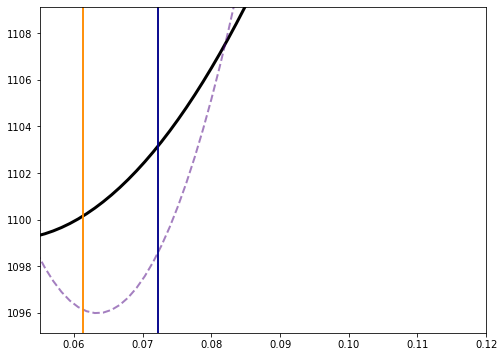

In [46]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(a_r,chi_mar_out,lw=3,color='black')
ax.plot(a_r,chi_r,lw=2,color='indigo',ls='--',alpha=0.5)
ax.plot(s1L_marg*np.ones(2),[chi_min_marg-4,chi_min_marg+10],color='darkorange')
ax.plot(s1R_marg*np.ones(2),[chi_min_marg-4,chi_min_marg+10],color='darkorange')
ax.plot(s2L_marg*np.ones(2),[chi_min_marg-4,chi_min_marg+10],color='darkblue')
ax.plot(s2R_marg*np.ones(2),[chi_min_marg-4,chi_min_marg+10],color='darkblue')
ax.set_xlim(0.055,0.12)
ax.set_ylim(chi_min_marg-4,chi_min_marg+10)

## Generalizations

**Priors** Notice that the marginalized likelihood is much wider than the one where $b=0$.  This makes sense, because forcing $b=0$ is some kind of extra knowledge we used. 

We can make sense of this using the idea of a prior, $P(H)$.  Specifically, the two extremes we have considered are just limits of the prior 
$$P(b) =\frac{1}{\sqrt{2\pi \sigma_b^2}} e^{-b^2/(2 \sigma_b^2)} $$
When $\sigma_b \to 0$, we recover the case where $b=0$ and when $\sigma_b \to \infty$ we recover a flat prior on $b$.  


In [47]:
def chi_marg_prior(data,a,t,s=1,b=0,sb=1):
    Mar_pos=integrate.quad(lambda x: Pos_line(data,a,x,t,s=1)*np.exp(-(x-b)**2/(2*sb**2))/(np.sqrt(2*np.pi*sb**2)),-2,2,epsabs=1.49e-16, epsrel=1.49e-16, limit=10000)[0]
    return -2*np.log(Mar_pos)

In [48]:
chi_prior={}
sig_b=[0.3,0.1,0.03,0.01]
for s in sig_b:
    chi_prior[s]=np.zeros(len(a_r))
for i in range(len(a_r)):
    for s in sig_b:
        chi_prior[s][i]=chi_marg_prior(data_t,a_r[i],trange,sb=s)

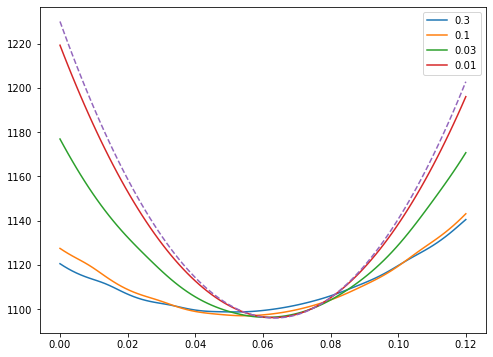

In [49]:
fig,ax=plt.subplots(figsize=(8,6))
for s in sig_b:
    ax.plot(a_r,chi_prior[s],label=str(s))
ax.plot(a_r,chi_r,ls='--')
ax.legend()
plt.show()

We see in this way what priors are doing for us: they are making it clear how to go between modes with more parameters and less parameters.  Reducing the number of parameters is an extreme version of adding information about parameters in the form of a prior.

However, as we will see in the next topic, there is a reason we don't just add models with lots of parameters and lots of priors when we don't need to: this integral to marginalize of $b$ becomes very challenging very quickly.

**Non-uniform Errors** So far we have been treating the error (std deviation of the noise) $\sigma$ as constant. When doing this, we saw that finding the maximum value of the posterior was the same the least squares fit that is typical of linear regression algorithms.

However, it is not true that the error in most data is uniform. For example, we might want to combine data taken at different times or with different detectors where the noise.  However, in many of these cases, we still understand the noise well enough to treak $\sigma$ as a known quantity.

We can easily adjust our model to include this option

In [50]:
def chi_line_s(data,a,b,t,s=1):
    noise2=((data-a*t-b)**2/(s**2)).sum()
    return noise2

This still has $s=1$ as a default, but let's put in $s$ is a decreasing function of time for both the data and our chi

In [51]:
data_s=0.07*trange+np.random.randn(1000)*(0.1+(trange-5)**2/25)

In [52]:
s_r=(0.1+(trange-5)**2/25)

In [53]:
chi_line_s(data_s,0.07,0,trange,s=s_r)

986.8217987942159

In [54]:
a_min_loc_s=minimize(lambda X:chi_line_s(data_s,X[0],X[1],trange,s=s_r),[0.070,0])['x']
a_min_loc_wrong=minimize(lambda X:chi_line(data_s,X[0],X[1],trange),[0.070,0])['x']

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

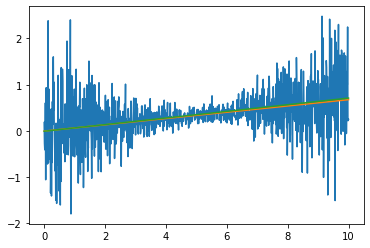

In [55]:
plt.plot(trange,data_s)
plt.plot(trange,a_min_loc_s[0]*trange+a_min_loc_s[1])
plt.plot(trange,a_min_loc_wrong[0]*trange+a_min_loc_wrong[1])
plt

In [56]:
a_min_loc_wrong,a_min_loc_s

(array([ 0.07166517, -0.00599876]), array([ 0.06788174, -0.00249711]))

Although the lines look similar, we see that weighting the data with the correct noise model gave a much better fit in terms of being much close to the true value.  Furthermore, we also know that it would make no sense to report undercertainties on our least squares fit, as the errors only make sense when you know $\sigma(t)$.

## Summary

Bayesian inference is argueably the most important framework in which to understand data, whether scientific or otherwise.  With very little work, we could understand a lot of seemingly complicated statistical tools as just examples of Bayes' theorem in special cases. Most important, the concept of uncertainty is essential when trying to understand the world: our knownledge isn't binary, but comes with levels of confidence.  Bayes' tells us how to make that uncertainty precise and do work for us.